## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

        id                                               text author
0  id26305  This process, however, afforded me no means of...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box, from wh...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else, not even gold, the Super...    HPL


<Axes: ylabel='count'>

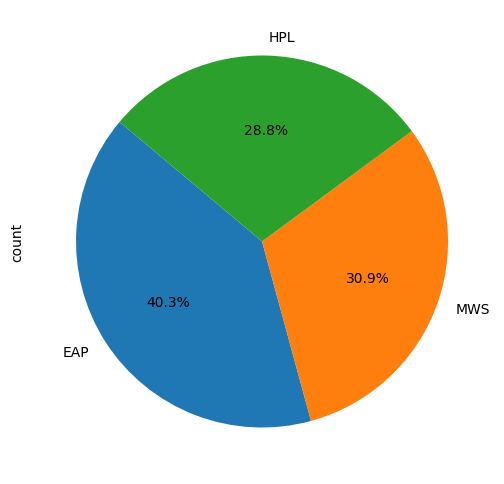

In [4]:
# Load the dataset
df = pd.read_csv('train.csv')
print(df.head())

plt.figure(figsize=(6,7))
df['author'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)

In [5]:
import re

def clean_text(text):
    """
    Cleans the text to allow the model to process it better
    Regularize punctuation, lowercasing, removing special characters,
    Leaves stopwords as they are valuable for the model
    """
    s = text.lower()
    s = re.sub(r"[^a-z0-9\s]", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

df['cleaned_text'] = df['text'].apply(clean_text)

# Encode Lables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['author']) 
df.head()

,id,text,author,cleaned_text,label
0,id26305,"This process, however, afforded me no means of...",EAP,this process however afforded me no means of a...,0
1,id17569,It never once occurred to me that the fumbling...,HPL,it never once occurred to me that the fumbling...,1
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,in his left hand was a gold snuff box from whi...,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,how lovely is spring as we looked from windsor...,2
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,finding nothing else not even gold the superin...,1


## Train, Test, Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=67
)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features = 20000,
    ngram_range= (1,2),
    sublinear_tf=True
)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train_vectorized, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


## Results

In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test_vectorized)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.830949948927477
              precision    recall  f1-score   support

         EAP       0.83      0.86      0.84      1587
         HPL       0.83      0.81      0.82      1150
         MWS       0.83      0.82      0.83      1179

    accuracy                           0.83      3916
   macro avg       0.83      0.83      0.83      3916
weighted avg       0.83      0.83      0.83      3916



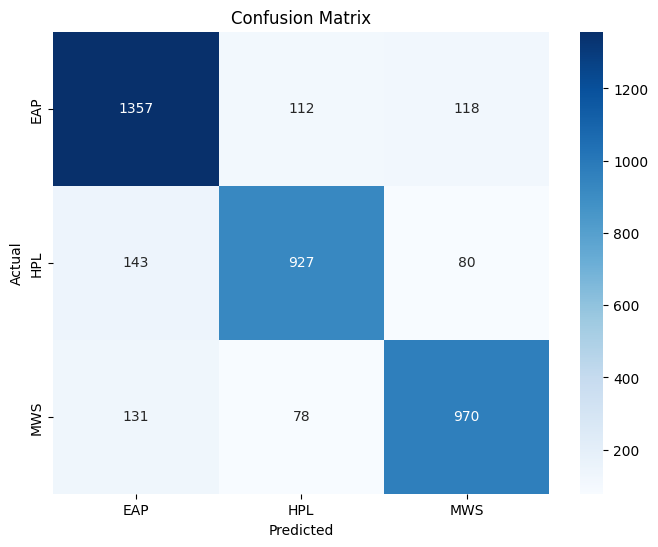

In [10]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()